In [23]:
import requests
import pandas as pd
from datetime import datetime as dt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [24]:
df2 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv') 
df1 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')

In [25]:
display(df1.head(3))
display(df2.head(3))

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56


In [26]:
df = pd.concat([df1, df2])

In [27]:
df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [28]:
unique_count_A = df['track_id'].nunique()
unique_count_A

130989

In [35]:
df_cleaned = df.drop_duplicates(subset='track_id')
track_id = df_cleaned['track_id']
track_name = df_cleaned['track_name']
df_cleaned.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)

C:\Users\Connor\AppData\Local\Temp\ipykernel_25408\53648802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)


In [36]:
df_cleaned

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,44
1,0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,10
2,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,63
3,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,9
4,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130643,0.279000,0.654,205034,0.788,0.000000,9,0.1900,-4.735,0,0.2060,152.032,4,0.4720,44
130649,0.105000,0.294,388600,0.652,0.001960,5,0.3780,-7.314,1,0.0336,75.335,4,0.1670,64
130653,0.108000,0.678,196364,0.795,0.000000,10,0.0995,-6.126,0,0.3440,176.157,4,0.9240,49
130656,0.668000,0.211,279070,0.284,0.000111,1,0.1050,-10.317,1,0.0385,83.905,4,0.0638,51


In [31]:
df['popularity'].value_counts()

popularity
0      30393
1       5584
19      5101
17      4986
22      4913
       ...  
96         8
98         4
97         2
100        2
99         1
Name: count, Length: 101, dtype: int64

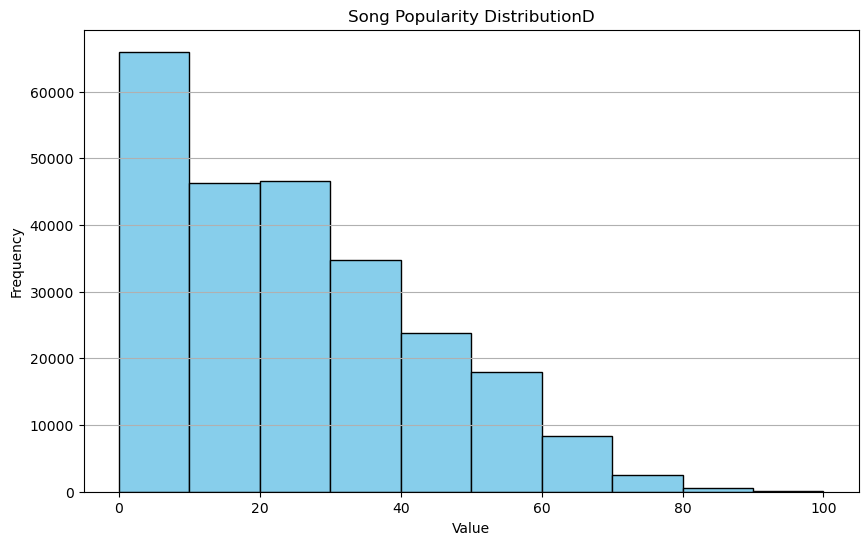

In [32]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=10, range=(0, 100), color='skyblue', edgecolor='black')
plt.title('Song Popularity DistributionD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()